In [1]:
import exodata
import pandas as pd 
import numpy as np 
import seaborn as sns 
import missingno as msno

In [2]:
import math 
from astropy import units as u
from mw_plot import MWPlot
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

In [3]:
import matplotlib.pyplot as plt
import exodata.astroquantities as aq
from IPython.display import display
from mlxtend.plotting import plot_confusion_matrix

In [4]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, f1_score

In [5]:
%matplotlib inline

In [6]:
def print_scores(y_test, y_hat_test, y_train, y_hat_train, model):
    print('_____________________________________________________')
    print('Training Accuracy Score : ' + str(accuracy_score(y_train, y_hat_train).round(4) * 100)[:5] + '%')
    print('Training Precision Score : ' + str(precision_score(y_train, y_hat_train).round(4) * 100)[:5] + '%')
    print('Training Recall Score : ' + str(recall_score(y_train, y_hat_train).round(4) * 100)[:5] + '%')
    print('Training F1 Score : ' + str(f1_score(y_train, y_hat_train).round(4) * 100)[:5] + '%')
    print('_____________________________________________________')
    trainresiduals = np.abs(y_train - y_hat_train)
    print('Training residual count:')
    print(str(pd.Series(trainresiduals).value_counts())[:-29])
    print('Training percentage correct: ' + str(pd.Series(trainresiduals).value_counts(normalize=True).round(4)*100)[7:-45])
    print('_____________________________________________________')
    print('Testing Accuracy Score : ' + str(accuracy_score(y_test, y_hat_test).round(4) * 100)[:5] + '%')
    print('Testing Precision Score : ' + str(precision_score(y_test, y_hat_test).round(4) * 100)[:5] + '%')
    print('Testing Recall Score : ' + str(recall_score(y_test, y_hat_test).round(4) * 100)[:5] + '%')
    print('Testing F1 Score : ' + str(f1_score(y_test, y_hat_test).round(4) * 100)[:5] + '%')
    print('_____________________________________________________')
    testresiduals = np.abs(y_test - y_hat_test)
    print('Testing residual count:')
    print(str(pd.Series(testresiduals).value_counts())[:-29])
    print('Testing percentage correct: ' + str(pd.Series(testresiduals).value_counts(normalize=True).round(4)*100)[7:-45])
    print('_____________________________________________________')
    print('                                                     ')
    print('Cross validated model accuracy:')
    scores = cross_val_score(model, X, y, cv=5)
    print('%0.2f with a standard deviation of %0.2f' % (scores.mean(), scores.std()))
    print('_____________________________________________________')

In [193]:
nan = star_csv.hd[119609].astype(str)

nan == nan2

True

In [200]:
def predict_a_star(star):
    """Test if a star in the hyg dataset will have a planet!
    pass in the star.loc[index_to_check] & answer some questions & the model will give you a yes or no!"""
    print('Your star type is: ' + star.spect)
    nan = star_csv.hd[0].astype(str)
    if star.proper is np.nan:
        if star.gl is np.nan:
            if star.hd.astype(str) == nan:
                if star.hr.astype(str) == nan:
                    if star.hip.astype(str) == nan:
                        starname = ''
                    else:
                        starname = f'HIP {star.hip}'
                else:
                    starname = f'HR {star.hr}'
            else:
                starname = f'HD {star.hd}'
        else:
            starname = f'GL {star.gl}'
    else:
        starname = f'Proper Name: {star.proper} '
    star = star.to_frame().transpose().reset_index()
    print('_____________________________________________________________________________________________')
    print('                     ')
    print('Please answer a few questions to help the program understand your star type.')
    empty_frame = X.head(1)
    for column in empty_frame.columns:
        empty_frame.at[0, column] = 0
    norms = ['dist', 'absmag', 'lum']
    for col in norms:
        empty_frame.at[0, col] = (star.at[0, col] - min(star_csv[col]))/ (max(star_csv[col]) - min(star_csv[col])) 
    emptyframe = empty_frame.fillna(0.0)
    print('_____________________________________________________________________________________________')
    print('                     ')
    print('Does the type contain any capitalized letters? Please list all applicable seperated by spaces.')
    print('Please do not include roman numerals, we will handle those seperatly.')
    input4 = input()
    letters = ['B', 'C', 'F', 'G', 'M', 'R',  'W', 'O', 'D']
    if input4 == '':
        pass 
    else: 
        input4 = input4.strip().upper()
        for item in input4:
            if item in letters:
                if item == 'R':
                    item = 'RD'
                empty_frame.at[0, f'{item}'] = 1
            else:
                continue
    print('_____________________________________________________________________________________________')
    print('                 ')
    print('Does it contain numbers? Please list all applicable seperated by spaces')
    input2 = input()
    if input2 == '':
        pass
    else:
        list_ = input2.split()
        for item in list_:
            if is_number(item):
                item = float(item)
                item = math.floor(item)
                empty_frame.at[0, f'{item}'] = 1
    print('_____________________________________________________________________________________________')
    print('                 ')
    print('Does it contain roman numerals? Please list all applicable seperated by spaces')
    lum_types = ['I', 'II', 'III', 'IV', 'V', 'VI']
    input1 = input()
    if input1 == '':
        pass 
    else: 
        input1 = input1.strip().upper()
        input1 = input1.split()
    for item in input1:
        if item in lum_types:
            empty_frame.at[0, item] = 1
    print('_____________________________________________________________________________________________')
    print('                 ')
    print('Does it contain any lowcase letters? Please list all applicable seperated by spaces.')
    input5 = input()
    lowerletters = ['sd', 'n', 'e', 'p', 'm']
    if input5 == '':
        pass 
    else: 
        input5 = input5.split()
        for item in input5:
            item = item.lower()
            if item in lowerletters:
                if item == 's':
                    item = 'sd'
                empty_frame.at[0, f'{item}'] = 1
            else:
                continue
    print('_____________________________________________________________________________________________')
    print('                     ')
    print('Does it contain any special symbols? Please list all applicable seperated by spaces.')
    print('Please substitute 1 in place of "...", 2 in place of "+", and 3  in place of ":"')
    input3 = input()
    if input3 == '':
        pass
    else:
        list_ = input3.split()
        for item in list_:
            if is_number(item):
                if item == 1:
                    item = '...'
                if item == 2:
                    item = '+'
                if item == 3:
                    item = ':'
                empty_frame.at[0, item] = 1
            else:
                continue
    print('Thank you for answering.')
    if bestmodellog.predict(empty_frame)[0] == 1:
        print(f'Your star, {starname} is unlikely to have a planet. :(')
    if bestmodellog.predict(empty_frame)[0] == 0:
        print(f'Your star, {starname} is very likely to have a planet. :)')
    pred_x = star.x
    pred_y = star.y
    pred_z = star.z
    return empty_frame, pred_x, pred_y, pred_z

In [8]:
def print_reports(y_test, y_hat_test, y_train, y_hat_train):
    print('                                                      ')
    print('               Testing Report:')
    report1 = classification_report(y_test, y_hat_test)
    print(report1)
    print('_____________________________________________________')
    print('               Training Report:')
    report2 = classification_report(y_train, y_hat_train)
    print(report2)
    print('_____________________________________________________')

In [9]:
def showconfusionmatrix(y_train, y_hat_train, title):
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_hat_train), colorbar=True, show_absolute=True, show_normed=True)
    plt.title(f'{title} Data')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['True', 'False'])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['True', 'False'])
    ax.set_ylabel('Actual Data')
    ax.set_xlabel('Predicted Data')
    plt.show()

In [10]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [11]:
def printVIF(data):
    # VIF dataframe 
    vif_data = pd.DataFrame() 
    vif_data["feature"] = data.columns 

    # calculating VIF for each feature 
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                              for i in range(len(data.columns))] 
    print(vif_data)

In [12]:
def showheatmap(data):
    fig, ax = plt.subplots(figsize=(35,30))
    corr = data.corr().abs().round(3)
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(corr, annot=True, mask=mask, cmap='YlGn', ax=ax)
    plt.setp(ax.get_xticklabels(), 
             rotation=45, 
             ha="right",
             rotation_mode="anchor")
    ax.set_title('Correlations')
    fig.tight_layout()

In [13]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
data = pd.read_csv('scrubbed.csv', dtype=float)
data = data.drop(['Unnamed: 0', 'HE', 'NEP', 'CE', 'CN', 'CJ', 'HN', 'HSE', 'JUP', 'SE', 'WJ', 'WN', 'WSE', 'A'], 1)

In [15]:
#drop incorrectly calculated distances & outliers
data = data.loc[data['dist'] < 100000]
data = data.loc[data['children'] < 8]

In [16]:
printVIF(data)

C:\ProgramData\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


         feature           VIF
0       children  2.019875e+00
1             ra  1.801440e+15
2            dec           inf
3           dist  4.829005e+00
4           pmra  1.061210e+09
5          pmdec  3.027142e+07
6             rv  1.056061e+00
7            mag  3.473090e+01
8         absmag  7.624755e+00
9             ci  1.881491e+01
10             x  3.413594e+00
11             y  1.932923e+00
12             z  1.617226e+00
13            vx  3.728226e+00
14            vy  1.888009e+00
15            vz  3.978515e+00
16         rarad  1.801440e+15
17        decrad           inf
18       pmrarad           inf
19      pmdecrad  2.373063e+11
20  comp_primary  1.283247e+02
21           lum  1.631055e+00
22             I  1.136104e+00
23            II  1.077774e+00
24           III  2.361380e+00
25            IV  1.273903e+00
26             V  2.366879e+00
27            VI  1.253379e+00
28           ...  1.465253e+00
29             :  1.101403e+00
30             +  1.284030e+00
31      

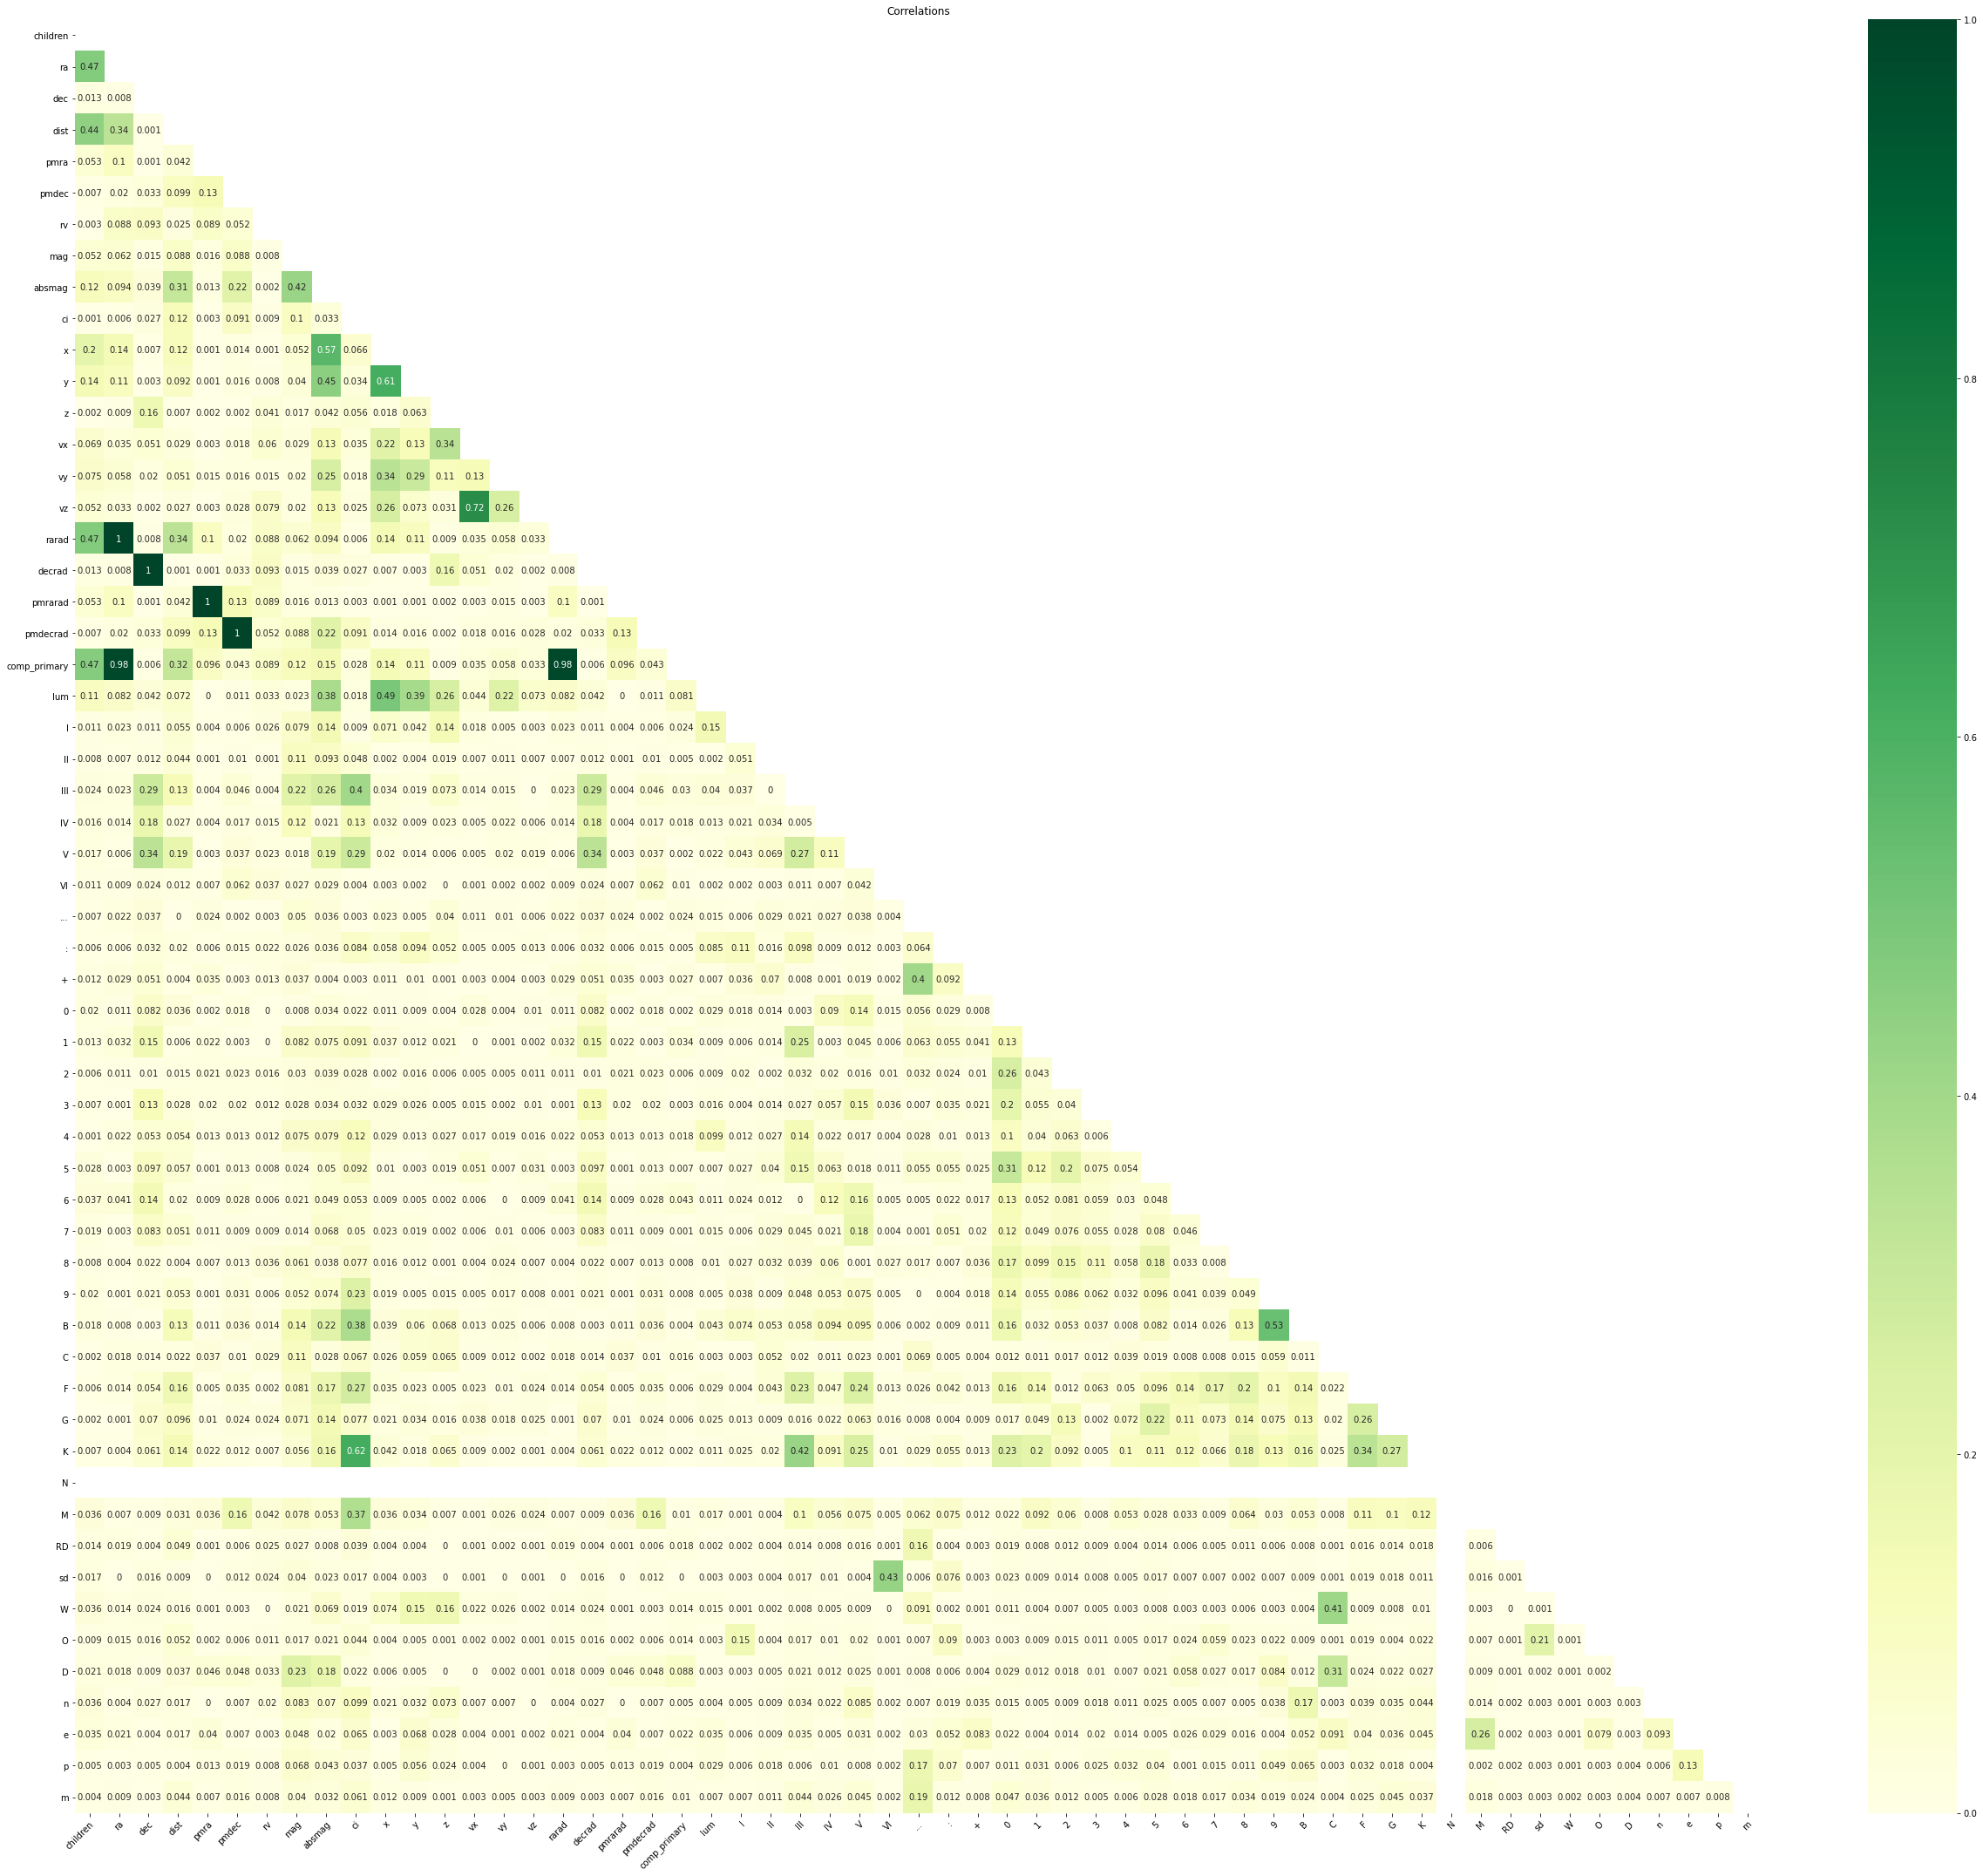

In [17]:
showheatmap(data)

In [18]:
data = data.drop(['vy', 'vz', 'vx', 'pmra', 'pmdec','rarad', 'decrad','pmrarad', 'pmdecrad', 'rv', 'x', 'y', 'z', 'N', 'dec', 'K', 'mag', 'ci',
                  'comp_primary', 'ra'], 1)
printVIF(data)

     feature       VIF
0   children  1.565510
1       dist  2.607072
2     absmag  2.153192
3        lum  1.255893
4          I  1.096148
5         II  1.054328
6        III  1.729628
7         IV  1.179375
8          V  1.909039
9         VI  1.245218
10       ...  1.426769
11         :  1.086413
12         +  1.267659
13         0  2.258835
14         1  1.426519
15         2  1.685727
16         3  1.492284
17         4  1.189123
18         5  2.185962
19         6  1.401715
20         7  1.299074
21         8  2.142470
22         9  1.774763
23         B  1.920180
24         C  1.399040
25         F  2.278055
26         G  1.941449
27         M  1.227614
28        RD  1.042799
29        sd  1.311238
30         W  1.245412
31         O  1.116892
32         D  1.208146
33         n  1.060892
34         e  1.167288
35         p  1.091280
36         m  1.072829


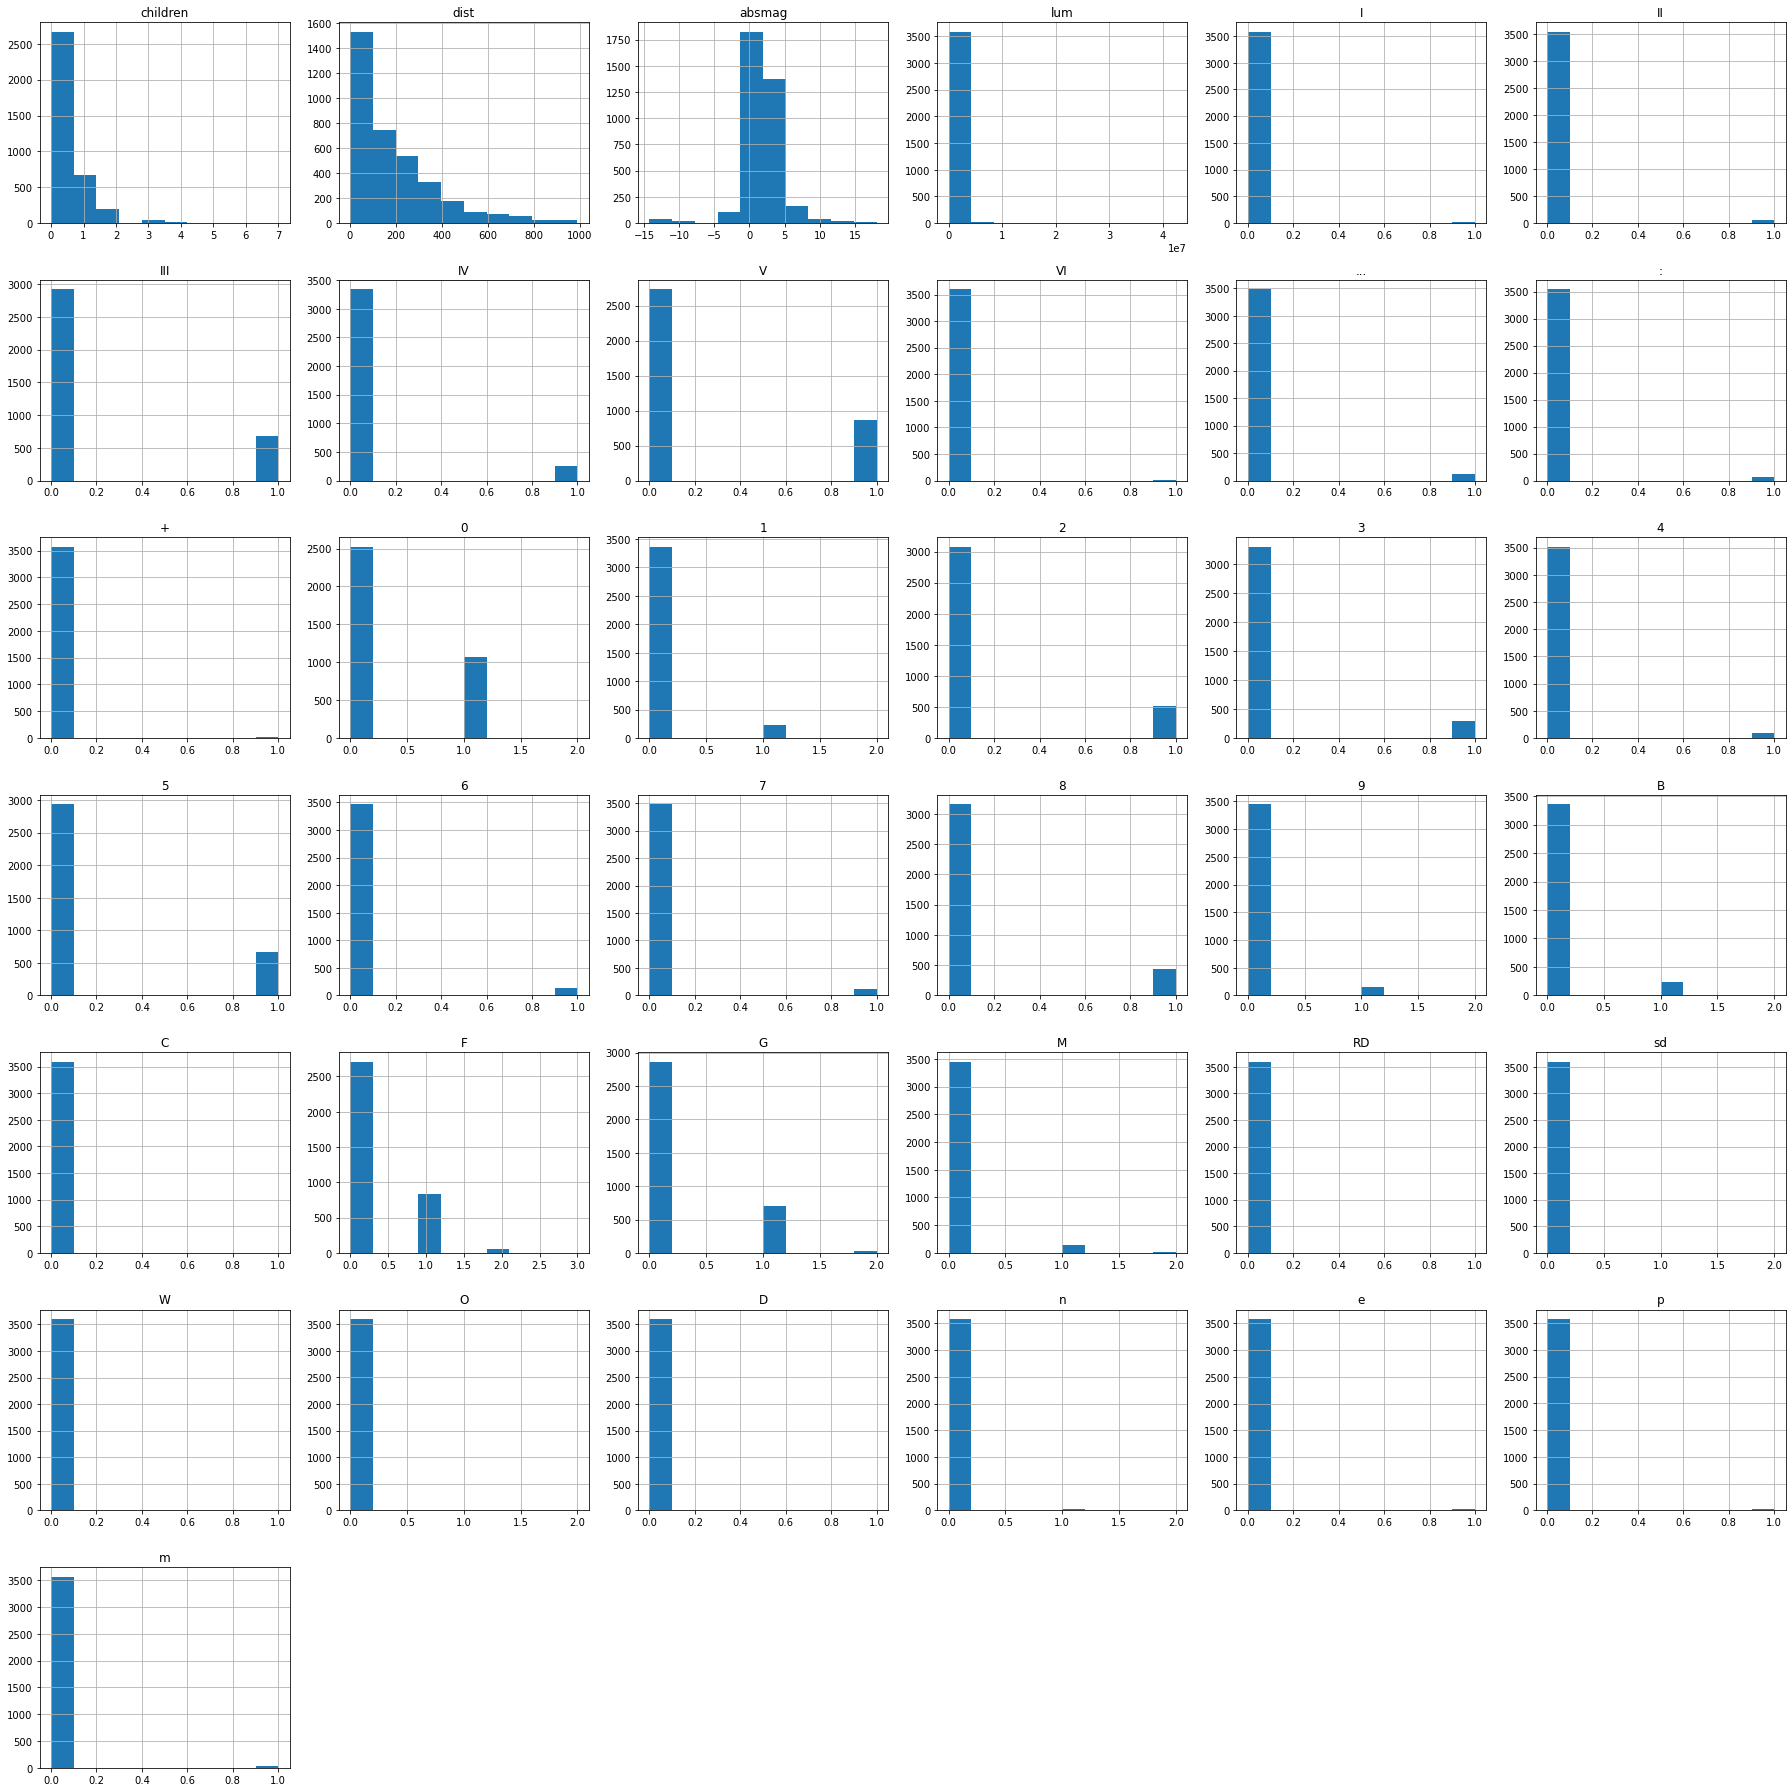

In [19]:
data.hist(figsize=(25,25))
plt.show()

In [20]:
columns_2_norm = ['dist', 'lum']
for col in columns_2_norm:
    # Subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    data[col] = (data[col] - min(data[col]))/ (max(data[col]) - min(data[col])) 

In [21]:
data['children'] = data['children'] > 0
data['children'] = data['children'].astype(str).replace(to_replace={'True':1.0, 'False':0.0})

In [22]:
X = data.drop(['children'], 1)
y = data['children']

# train test split 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)

In [23]:
firstlogreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
firstlogmodel = firstlogreg.fit(X_train1, y_train1)

In [24]:
y_hat_test1 = firstlogreg.predict(X_test1)
y_hat_train1 = firstlogreg.predict(X_train1)

In [25]:
print_reports(y_test1, y_hat_test1, y_train1, y_hat_train1)

                                                      
               Testing Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       645
         1.0       0.98      0.98      0.98       255

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

_____________________________________________________
               Training Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2021
         1.0       0.96      0.99      0.97       677

    accuracy                           0.99      2698
   macro avg       0.98      0.99      0.98      2698
weighted avg       0.99      0.99      0.99      2698

_____________________________________________________


In [26]:
print_scores(y_test1, y_hat_test1, y_train1, y_hat_train1, firstlogreg)

_____________________________________________________
Training Accuracy Score : 98.67%
Training Precision Score : 95.98%
Training Recall Score : 98.82%
Training F1 Score : 97.38%
_____________________________________________________
Training residual count:
0.0    2662
1.0      36
Training percentage correct: 98.6
_____________________________________________________
Testing Accuracy Score : 98.89%
Testing Precision Score : 98.04%
Testing Recall Score : 98.04%
Testing F1 Score : 98.04%
_____________________________________________________
Testing residual count:
0.0    890
1.0     10
Testing percentage correct: 98.8
_____________________________________________________
                                                     
Cross validated model accuracy:
0.98 with a standard deviation of 0.01
_____________________________________________________


In [27]:
pipe = Pipeline([('classifier' , LogisticRegression())])
    
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
     'classifier__C' : np.logspace(-4, 4, 20),
     'classifier__fit_intercept' : [True, False],
     'classifier__solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']}]

# Create grid search object
clf = GridSearchCV(pipe, param_grid, cv=10, estimator='recall',  n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train2, y_train2)

In [28]:
best_clf.best_params_

{'classifier': LogisticRegression(C=11.288378916846883, penalty='l1', solver='liblinear'),
 'classifier__C': 11.288378916846883,
 'classifier__fit_intercept': True,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [29]:
bestmodellog = LogisticRegression(C=11.288378916846883, penalty='l1', solver='liblinear')
secondlogmodel = bestmodellog.fit(X_train2, y_train2)

In [30]:
y_hat_test2 = bestmodellog.predict(X_test2)
y_hat_train2 = bestmodellog.predict(X_train2)

In [31]:
print_reports(y_test2, y_hat_test2, y_train2, y_hat_train2)

                                                      
               Testing Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       645
         1.0       0.98      0.98      0.98       255

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

_____________________________________________________
               Training Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2021
         1.0       0.96      0.99      0.97       677

    accuracy                           0.99      2698
   macro avg       0.98      0.99      0.98      2698
weighted avg       0.99      0.99      0.99      2698

_____________________________________________________


In [32]:
print_scores(y_test2, y_hat_test2, y_train2, y_hat_train2, bestmodellog)

_____________________________________________________
Training Accuracy Score : 98.67%
Training Precision Score : 95.85%
Training Recall Score : 98.97%
Training F1 Score : 97.38%
_____________________________________________________
Training residual count:
0.0    2662
1.0      36
Training percentage correct: 98.6
_____________________________________________________
Testing Accuracy Score : 98.89%
Testing Precision Score : 97.67%
Testing Recall Score : 98.42%
Testing F1 Score : 98.05%
_____________________________________________________
Testing residual count:
0.0    890
1.0     10
Testing percentage correct: 98.8
_____________________________________________________
                                                     
Cross validated model accuracy:
0.98 with a standard deviation of 0.02
_____________________________________________________


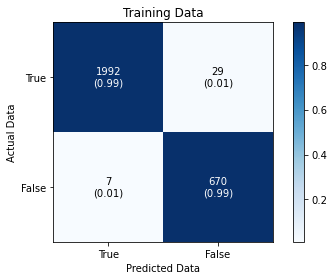

In [33]:
showconfusionmatrix(y_train2, y_hat_train2, 'Training')

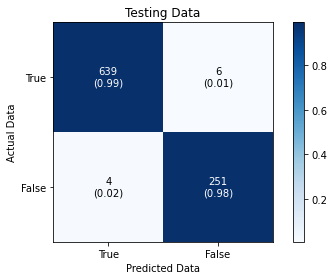

In [34]:
showconfusionmatrix(y_test2, y_hat_test2, 'Testing')

In [35]:
y_score = bestmodellog.fit(X_train2, y_train2).decision_function(X_test2)
fpr, tpr, thresholds = roc_curve(y_test2, y_score)

In [95]:
X

dist     absmag           lum    I   II  III   IV    V   VI  ...    :    +    0    1    2    3    4    5    6    7    8    9    B    C    F    G    M   RD   sd    W    O    D    n    e    p    m
0  0.002584   0.503429  4.879777e-08  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.011121   1.828000  3.808903e-07  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.009099   4.177000  4.377224e-08  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.009099  -0.998000  5.142804e-06  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.012132   4.548000  3.110272e-08  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.011121   0.326000  1.519148e-06  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.010110   2.808000  1.544542e-07  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  0.004044   4.140000  4.528964e-08  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8  0.008088 -12.290000  1.690441e-01  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9  0.009099   1.573000  4.817258e-07  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

AUC: 0.99687490500076


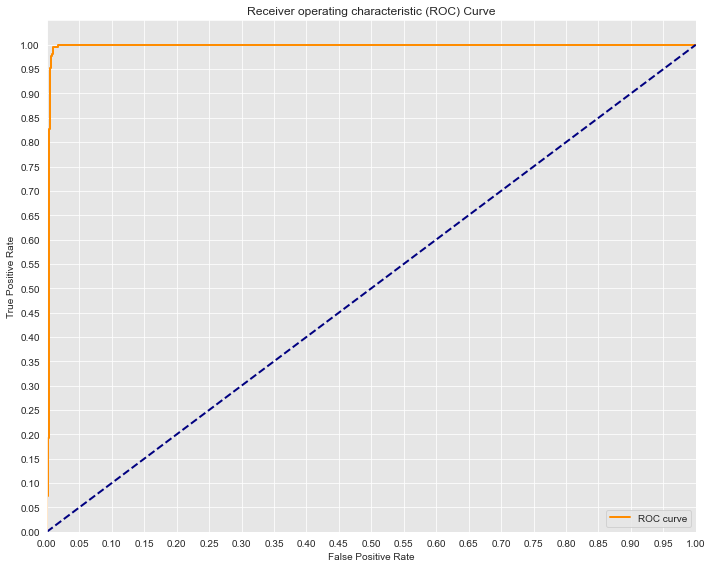

In [36]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

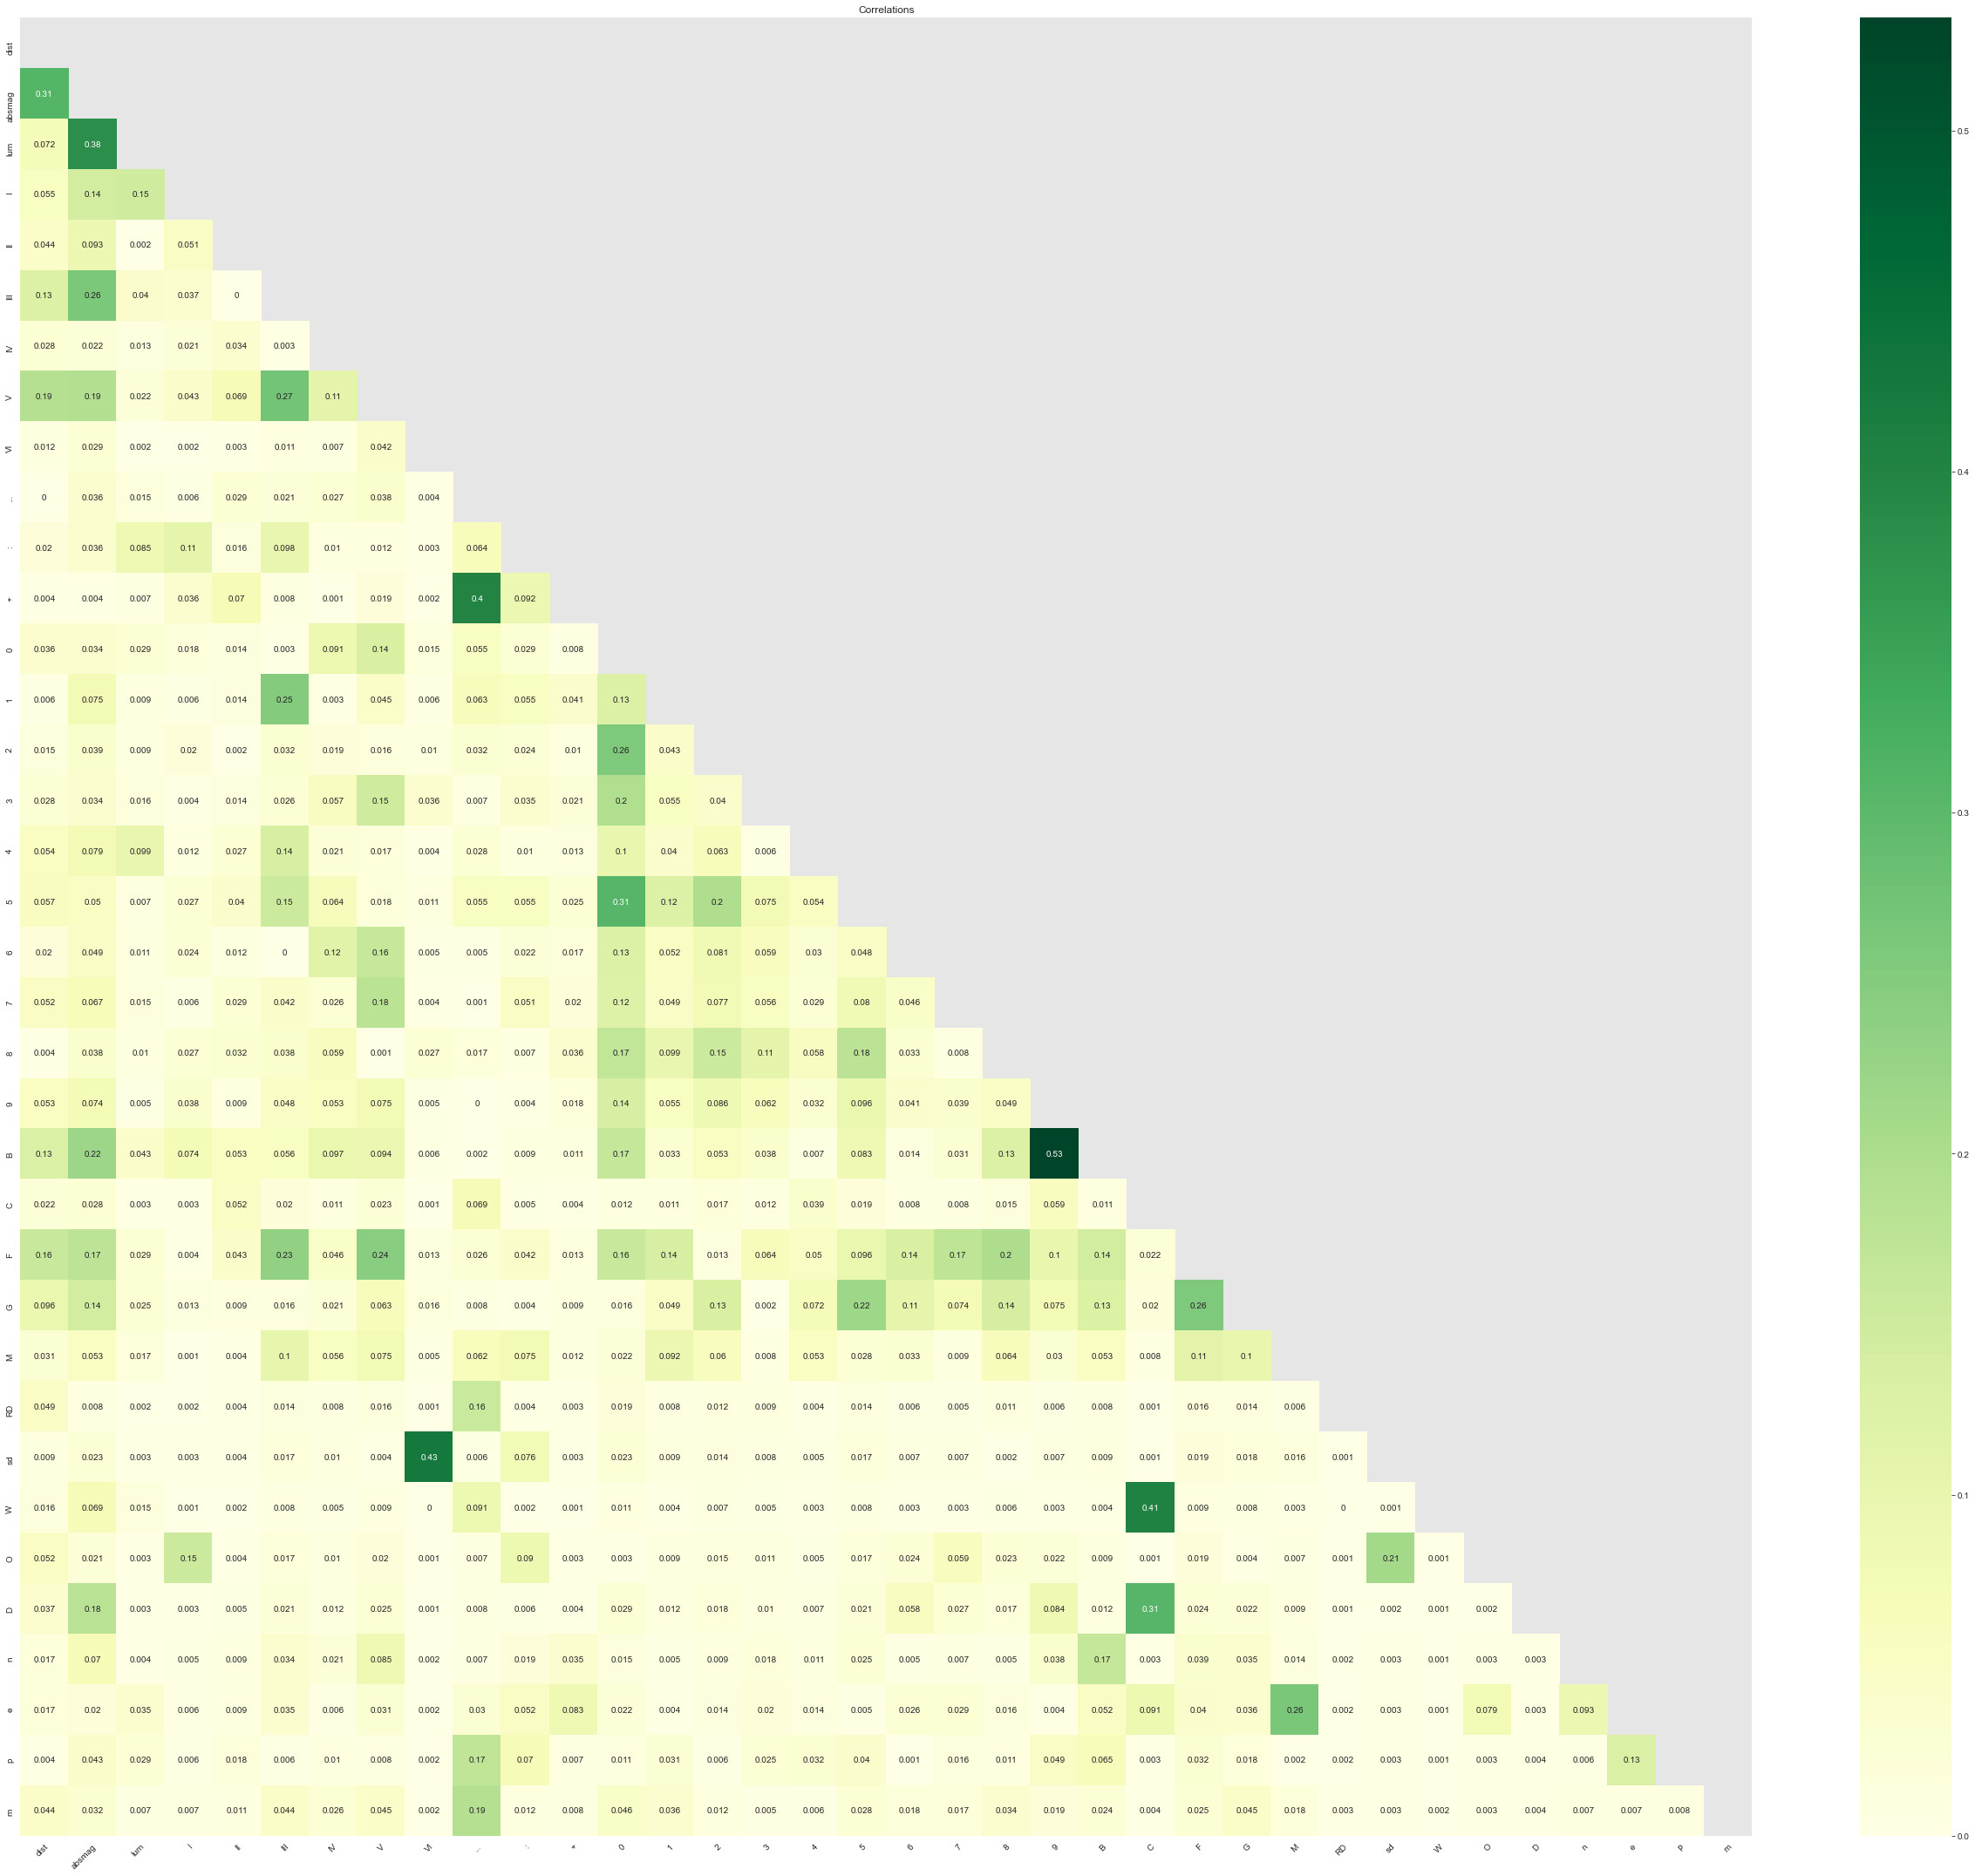

In [90]:
showheatmap(X)

In [96]:
bestmodellog.coef_[0]

array([-1.97463840e+02, -3.53555228e-01,  0.00000000e+00,  0.00000000e+00,
       -5.48515427e-01,  7.15902510e-02, -1.17210216e+00, -5.05830468e-01,
        0.00000000e+00,  2.00240134e-01,  3.57054484e-01, -2.29975729e-01,
        4.39104630e-02, -5.45965982e-01, -5.29146260e-02, -3.05253947e-01,
       -9.11516173e-01,  0.00000000e+00,  9.16264366e-02, -8.36033695e-02,
       -1.74819936e-01, -1.16741220e-01, -5.08927415e-02,  0.00000000e+00,
        3.07789496e-01, -2.25789250e-01, -7.57657236e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.95192152e-01,
       -2.52668861e+00,  1.68802883e+00, -1.75283199e+00,  0.00000000e+00])

In [98]:
coefs = bestmodellog.coef_[0]
column_names = X.columns
dict_ = {}
for i,v in enumerate(coefs):
    dict_[i] = {}
    dict_[i]['feature'] = column_names[i]
    dict_[i]['score'] = v

# coef_frame = pd.DataFrame.from_dict(dict_)
# new_header = coef_frame.iloc[0]
# coef_frame = coef_frame[1:] 
# coef_frame.columns = new_header
# ranked = coef_frame.transpose()['score'].rank(pct = True).to_frame()

In [106]:
X.II.value_counts()

0.0    3545
1.0      53
Name: II, dtype: int64

In [99]:
# top_5 = ranked.sort_values(by='score')[:5]
dict_

{0: {'feature': 'dist', 'score': -197.46383982307688},
 1: {'feature': 'absmag', 'score': -0.3535552278679218},
 2: {'feature': 'lum', 'score': 0.0},
 3: {'feature': 'I', 'score': 0.0},
 4: {'feature': 'II', 'score': -0.5485154265989914},
 5: {'feature': 'III', 'score': 0.07159025104379252},
 6: {'feature': 'IV', 'score': -1.1721021607725146},
 7: {'feature': 'V', 'score': -0.505830467788776},
 8: {'feature': 'VI', 'score': 0.0},
 9: {'feature': '...', 'score': 0.20024013443797675},
 10: {'feature': ':', 'score': 0.3570544843844946},
 11: {'feature': '+', 'score': -0.22997572935012958},
 12: {'feature': '0', 'score': 0.04391046301594623},
 13: {'feature': '1', 'score': -0.5459659818362902},
 14: {'feature': '2', 'score': -0.05291462595755975},
 15: {'feature': '3', 'score': -0.30525394699929076},
 16: {'feature': '4', 'score': -0.9115161727967285},
 17: {'feature': '5', 'score': 0.0},
 18: {'feature': '6', 'score': 0.09162643659250042},
 19: {'feature': '7', 'score': -0.083603369474085

In [70]:
star_csv = pd.read_csv('hygdata_v3.csv')
star_csv = star_csv.loc[star_csv.x != np.nan]
star_csv = star_csv.loc[star_csv.ra != np.nan]

In [84]:
sun = star_csv.loc[0]
sunx = sun['x']
suny = sun['y']
sunz = sun['z']

In [201]:
star, pred_x, pred_y, pred_z = predict_a_star(star_csv.loc[110001])

Your star type is: K2
_____________________________________________________________________________________________
                     
Please answer a few questions to help the program understand your star type.
_____________________________________________________________________________________________
                     
Does the type contain any capitalized letters? Please list all applicable seperated by spaces.
Please do not include roman numerals, we will handle those seperatly.


 k


_____________________________________________________________________________________________
                 
Does it contain numbers? Please list all applicable seperated by spaces


 2


_____________________________________________________________________________________________
                 
Does it contain roman numerals? Please list all applicable seperated by spaces


_____________________________________________________________________________________________
                 
Does it contain any lowcase letters? Please list all applicable seperated by spaces.


_____________________________________________________________________________________________
                     
Does it contain any special symbols? Please list all applicable seperated by spaces.
Please substitute 1 in place of "...", 2 in place of "+", and 3  in place of ":"


Thank you for answering.
Your star, HIP 110347.0 is very likely to have a planet. :)


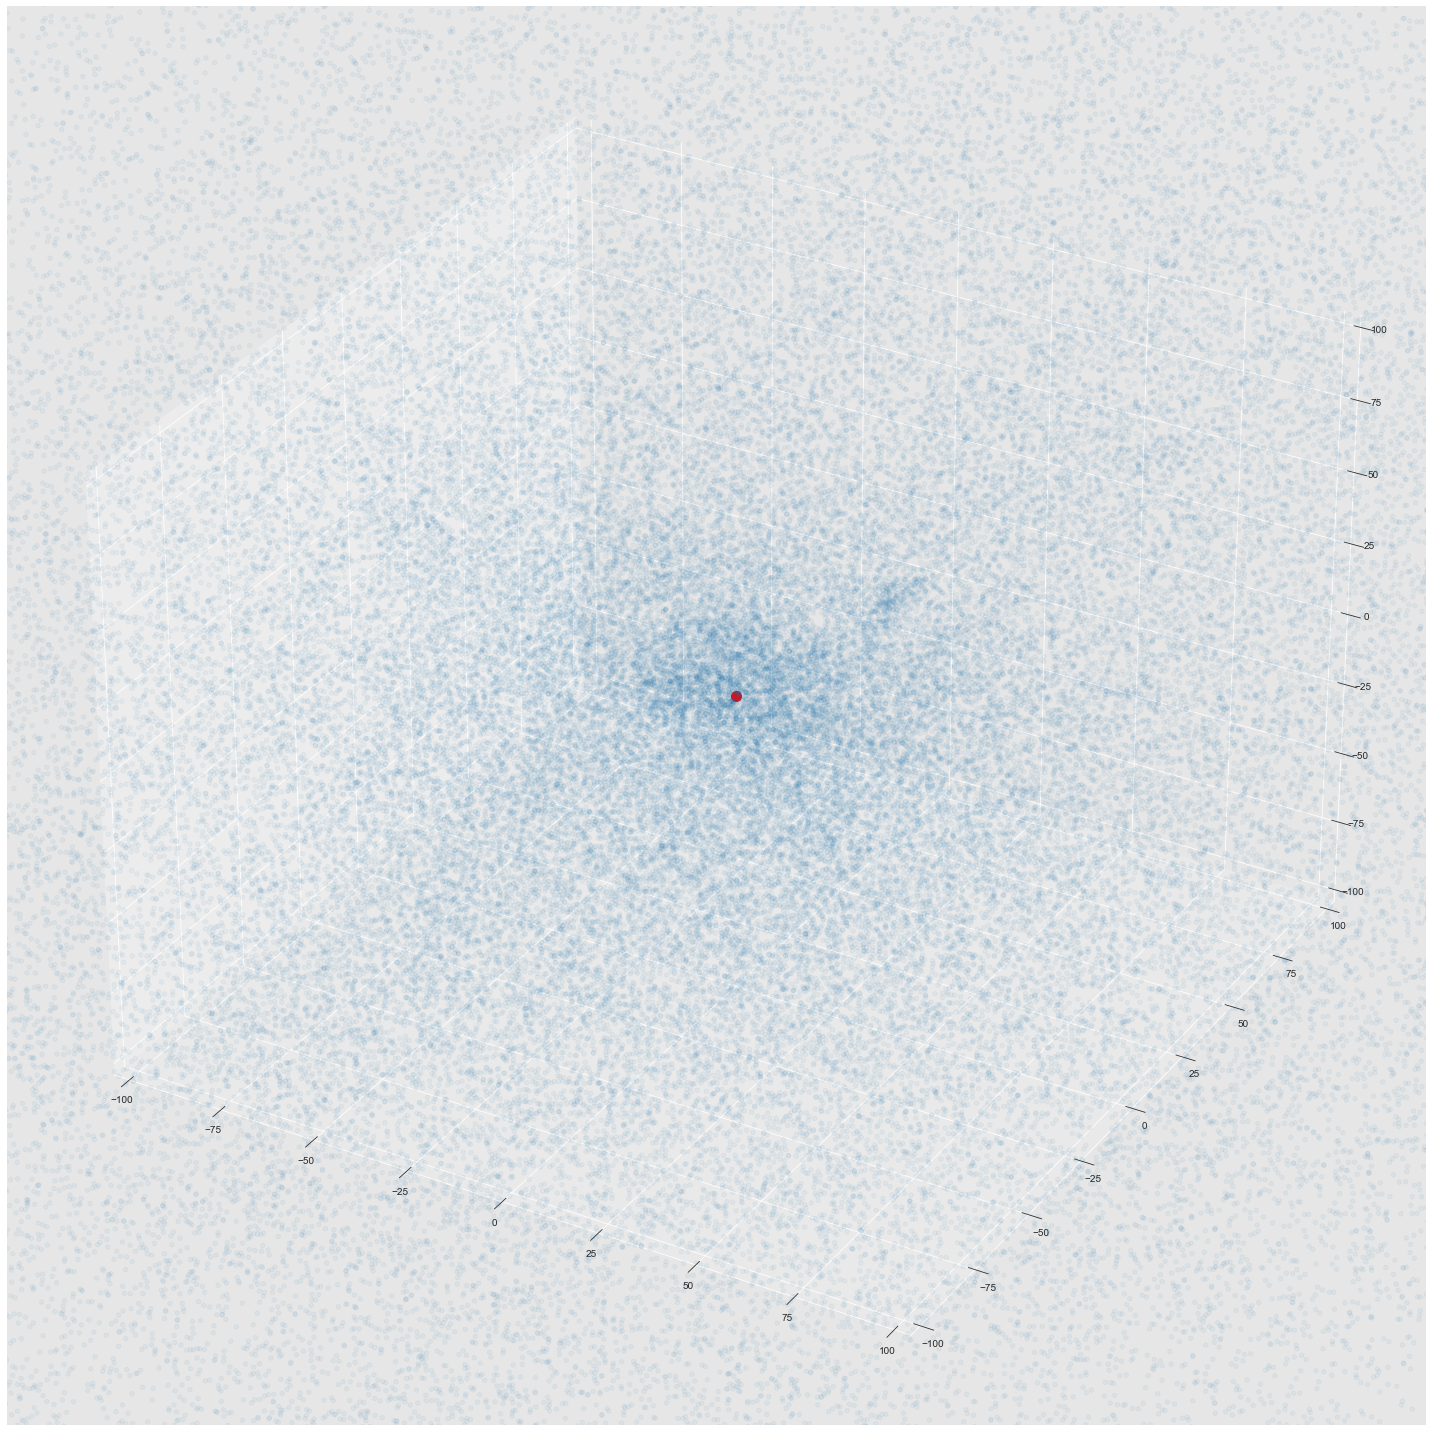

In [153]:
star_csv = star_csv[star_csv['x'] != np.nan]
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
zdata = star_csv['z'][1:]
xdata = star_csv['x'][1:]
ydata = star_csv['y'][1:]
ax.scatter(xdata, ydata, zdata, cmap='Blue', alpha=.05)
ax.scatter(x, y, z, c='Red', alpha=1, s=100)
ax.scatter(pred_x, pred_y, pred_z, c='Yellow', alpha=1, s=100)
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.plot([1.], [1.], [1.])
plt.show()

In [75]:
ra = Longitude(star_csv['ra'], unit=u.deg)
dec = np.array(star_csv['dec']) * u.deg


In [80]:
c = SkyCoord(ra[1], dec[1], frame='icrs')

In [81]:
from mw_plot import MWSkyMap

In [85]:
plot_instance = MWPlot(mode='face-on', center=(0, 0)*u.kpc, radius=90750*u.lyr,
                       unit=u.kpc, coord='galactic', annotation=True, rot180=False, grayscale=False)
plot_instance.mw_scatter(sunx, suny,[sunz, 'colorbar_title'])
plt.show()

TypeError: Both x and y must carry astropy's unit

In [88]:
CartesianRepresentation(sunx, suny, sunz)

NameError: name 'CartesianRepresentation' is not defined